In [52]:
# %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
# city_data_to_load = city_data_to_load.drop_duplicates("city")

ride_data_to_load = pd.read_csv("data/ride_data.csv")
ride_data_to_load1 = ride_data_to_load.drop_duplicates("city")


# Read the City and Ride Data
# city_data_to_load.head()
# ride_data_to_load.head

# # Combine the data into a single dataset
merge_table = pd.merge(ride_data_to_load1,city_data_to_load, on="city")
merge_table1 = pd.merge(ride_data_to_load,city_data_to_load, on="city")

# # Display the data table for preview
# merge_table.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

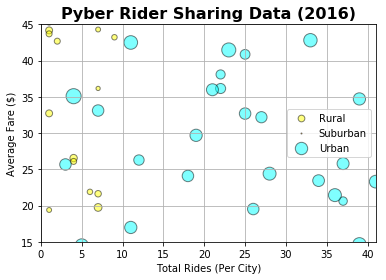

In [57]:
# Obtain the x and y coordinates for each of the three city types
# urban = merge_table[merge_table["type"] =="Urban"]['city'].nunique()
city_average = merge_table.groupby(['city']).mean()["fare"]
driver_count = merge_table.groupby(['city']).sum()["driver_count"]
# citydata = city_data_to_load
# citydata = citydata.set_index("city")
total_count = ride_data_to_load.groupby('city').count()['fare']

Data ={"Average Fare": city_average,
         "Driver Per City":driver_count,
         "Total count": total_count}

data_df = pd.DataFrame(Data)
data_df

# Build the scatter plots for each city types

GraphData = pd.merge(city_data_to_load, data_df, how="right", on="city")
Urban = GraphData.loc[GraphData['type']== "Urban",:]
Rural = GraphData.loc[GraphData['type']== "Rural",:]
Suburban = GraphData.loc[GraphData['type']== "Subrban",:]

x_axis1 = Urban["Driver Per City"]
y_axis1 = Urban["Average Fare"]
size1 = Urban["Total count"]
lables1 = "Urban"

x_axis2 = Rural["Driver Per City"]
y_axis2 = Rural["Average Fare"]
size2 = Rural["Total count"]
lables2 = "Rural"

x_axis3 = Suburban["Driver Per City"]
y_axis3 = Suburban["Average Fare"]
size3 = Suburban["Total count"]
lables3 = "Suburban"


# Incorporate the other graph properties
plt.scatter(x_axis2, y_axis2, linewidth=0, marker="o", color="yellow", alpha=0.5, s=size2*6, edgecolor="black", label="Rural", lw=1)
plt.scatter(x_axis3, y_axis3, linewidth=0, marker="o", color="orange", alpha=0.5, s=size3*6, edgecolor="black", label="Suburban", lw=1)
plt.scatter(x_axis1, y_axis1, linewidth=0, marker="o", color="cyan", alpha=0.5, s=size1*6, edgecolor="black", label="Urban", lw=1)
plt.xlim(0, 41)
plt.ylim(15, 45)
plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend
plt.title("Pyber Rider Sharing Data (2016)", fontsize=16, fontweight="bold")
plt.legend()
plt.grid()
# Incorporate a text label regarding circle size

# Save Figure
# plt.savefig("Images/Pyber Rider Sharing Data 2016.png")
plt.show()

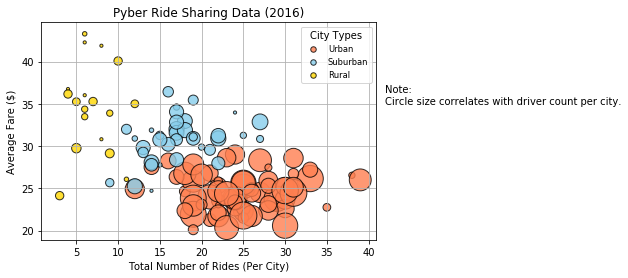

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

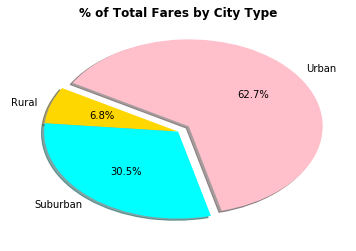

In [66]:
# Calculate Type Percents
percents = merge_table1.groupby(["type"]).sum()["fare"]
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
fares = [percents[0], percents[1], percents[2]]
colors = ["gold", "cyan", "pink"]
explode = (0, 0, 0.1)
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type", fontweight="bold")

plt.show()
# Save Figure


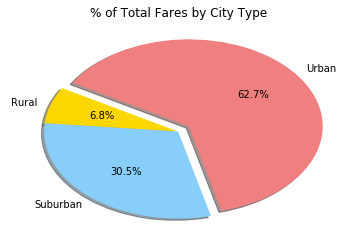

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

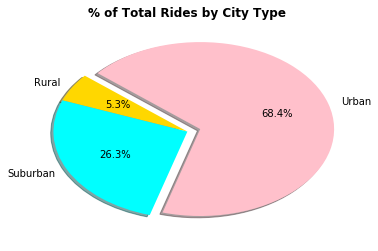

In [63]:
# Calculate Ride Percents
ridesxCity = merge_table1.groupby(['type']).count()["fare"]

labels = ["Rural", "Suburban", "Urban"]
rides = [ridesxCity[0], ridesxCity[1], ridesxCity[2]]
colors = ["gold", "cyan", "pink"]
explode = (0, 0, 0.1)
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type", fontweight="bold")

plt.show()
# Build Pie Chart

# Save Figure


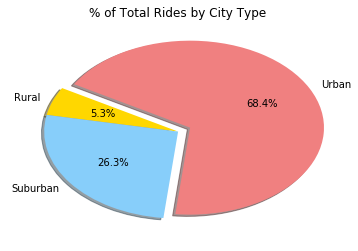

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

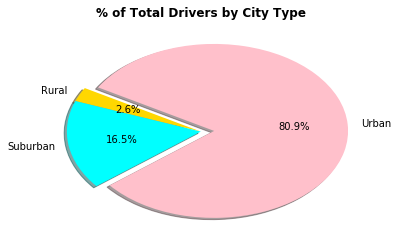

In [68]:
# Calculate Driver Percents
rides = city_data_to_load.groupby(['type']).sum()["driver_count"]

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
drivers = [rides[0],rides[1], rides[2]]
colors = ["gold", "cyan", "pink"]
explode = (0, 0, 0.1)
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type", fontweight="bold")
plt.show()
# Save Figure


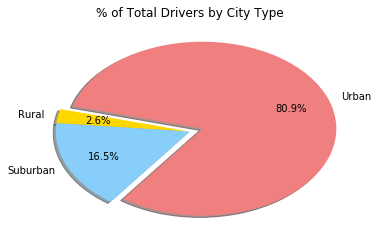

In [6]:
# Show Figure
plt.show()